In [1]:
import random
import matplotlib.pyplot as plt
import sys
from collections import defaultdict

import networkx as nx
import matplotlib.pyplot as plt

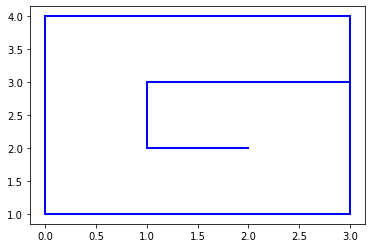

Dictionnaire de graphe:
{'1': {'2': 1, '0': 1}, '2': {'1': 1}, '6': {'3': 1, '7': 1}, '3': {'6': 1, '0': 1}, '5': {'4': 1, '8': 1}, '4': {'5': 1}, '8': {'5': 1, '7': 1}, '7': {'6': 1, '8': 1}, '0': {'1': 1, '3': 1}}
None


In [66]:
class Labyrinthe_02:
    def __init__(self, width, height):
        self.width=width
        self.height=height
        self.cells=[]
        zone=0
        num_cell=0
        self.graph0=defaultdict(list)
        #self.graph = defaultdict(lambda: defaultdict(int))
        
        #construction des cellules fermées et de la liste des zones initiales
        #origine en haut à gauche
        for i in range(height):
            self.cells.append([])
            for j in range(width):
                #chaque cell est entièrement fermée
                #False = on passe pas = mur fermé ; True = on peut passer = mur ouvert
                self.cells[i].append({'N':False, 'E':False, 'S':False, 'W':False, 'zone':zone, 'num_cell': num_cell})#chaque zone est unique au départ zone=i*width+j
                zone+=1
                num_cell+=1
        self.n_zones=width*height
        self.generer()


    def fusionner(self, i1, j1, dir):
        #i2,j2 et dir2 sont associés à la case de la direction opposée
        if dir=='N':
            i2=i1-1;j2=j1;dir2='S'
        elif dir=='S':
            i2=i1+1;j2=j1;dir2='N'
        elif dir=='W':
            i2=i1;j2=j1-1;dir2='E'
        elif dir=='E':
            i2=i1;j2=j1+1;dir2='W'

        if(i2>=0 and i2<self.height and j2>=0 and j2<self.width):
            zone1=self.cells[i1][j1]['zone']
            zone2=self.cells[i2][j2]['zone']
            if zone1!=zone2:
                self.cells[i1][j1][dir]=True
                self.cells[i2][j2][dir2]=True
                self.graph0[str(self.cells[i1][j1]['num_cell'])].append(str(self.cells[i2][j2]['num_cell']))
                self.graph0[str(self.cells[i2][j2]['num_cell'])].append(str(self.cells[i1][j1]['num_cell']))
                #print(self.graph0)
                #fusion des zones :
                for i in range(self.height):
                    for j in range(self.width):
                        if self.cells[i][j]['zone']==zone2:
                            self.cells[i][j]['zone']=zone1
                self.n_zones-=1;#permettra de s'arrêter sans vider toute la pile
                return zone1,  self.graph0
        return False
        


    def generer(self):
        #cells à traiter
        pile_cells=[]
        for dir in ['N', 'E', 'S', 'W']:
            for i in range(self.height):
                for j in range(self.width):
                    pile_cells.append((i,j,dir))
        random.shuffle(pile_cells)
        while(len(pile_cells)>0 and self.n_zones>1):
            (i,j,dir)=pile_cells.pop()
            self.fusionner(i,j,dir)
            #décommenter ci-dessous pour visualiser les étapes :
            #self.print(True)
        return self.cells
    def print_plot(self):
        for i in range(self.height):
            y=self.height - i
            color="b"
            for j in range(self.width):
                x=j
                for dir in ['N', 'E', 'S', 'W' ]:
                    if not self.cells[i][j]['N']:
                        plt.plot([x,x+1], [y+1,y+1], color)
                    if not self.cells[i][j]['E']:
                        plt.plot([x+1,x+1], [y,y+1],color)
                    if not self.cells[i][j]['S']:
                        plt.plot([x,x+1], [y,y],color)
                    if not  self.cells[i][j]['W']:
                        #print("plot gauche")
                        plt.plot([x,x], [y,y+1],color)
        plt.show()







        
n=3
laby = Labyrinthe_02(n,n)
laby.print_plot()
list_parcours=laby.graph0

{'1': {'2': 1, '0': 1}, '2': {'1': 1}, '6': {'3': 1, '7': 1}, '3': {'6': 1, '0': 1}, '5': {'4': 1, '8': 1}, '4': {'5': 1}, '8': {'5': 1, '7': 1}, '7': {'6': 1, '8': 1}, '0': {'1': 1, '3': 1}}


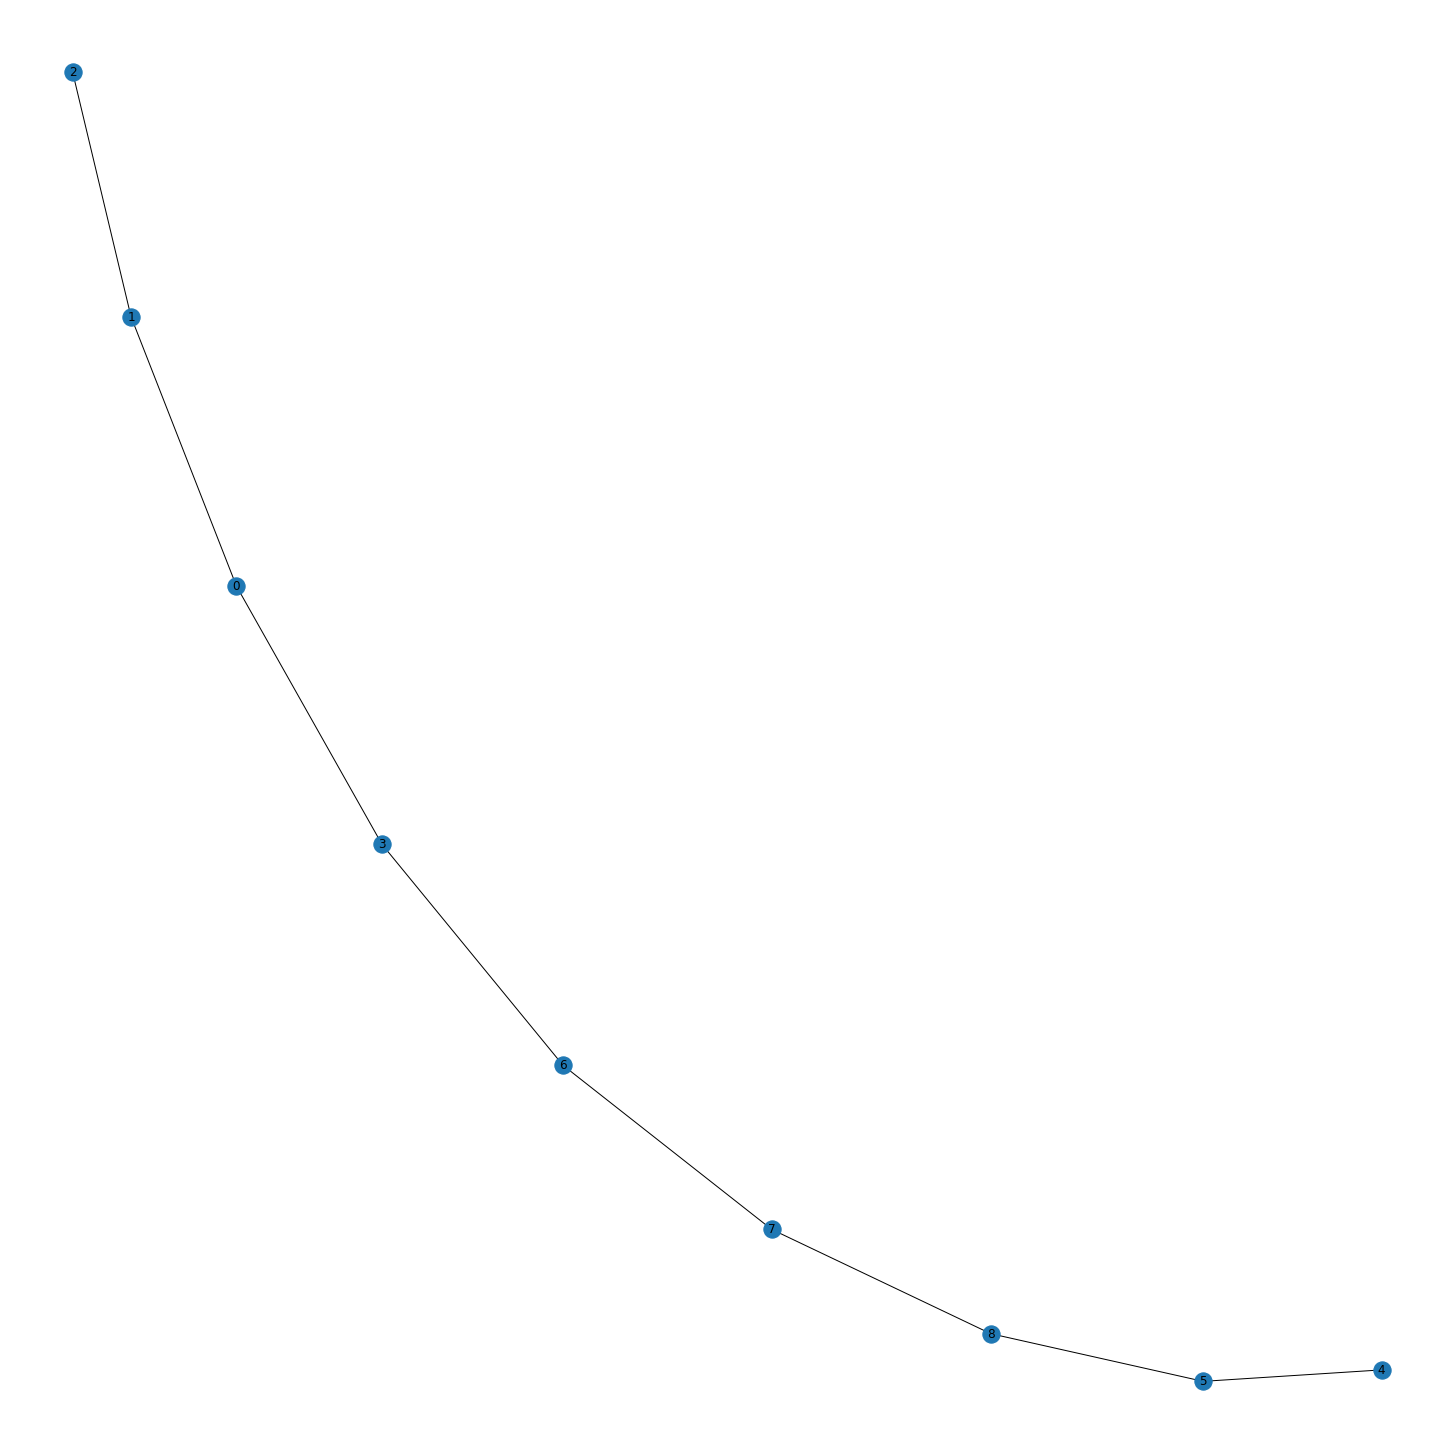

In [91]:
# Programme pour dictionnaires imbriqués
G1={}
#print()
for i, j in list_parcours.items():
    dic_t={}
    for k in j:
        dic_t[k]=1
    G1[i]=dic_t

print(G1)

X_ = nx.Graph(G1)
plt.figure(figsize=(20,20))
nx.draw(X_,with_labels=True)


In [90]:
algo_dijkstra= nx.shortest_path(X_, '0', '8')
algo_dijkstra
for i in algo_dijkstra:
    X, Y = [], []
    X.append(int(i)//n)                   ## division entière pour le X
    Y.append(int(i)%n)                    ## reste pour le Y
    print(X,Y)

[0] [0]
[1] [0]
[2] [0]
[2] [1]
[2] [2]
